# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



1. [Изучение данных](#start)
    * [Описание данных](#description)
    * [Обзор](#review)
    * [Вывод](#conclution1)
2. [Предобработка данных](#preprocessing)
    * [Вывод](#conclution2)
3. [Анализ данных](#eda)
    * [Вывод](#conclution3)
4. [Портрет пользователя](#users)
    * [Вывод](#conclution4)
5. [Проверка гипотез](#hypoteses)
    * [Вывод](#conclution5)
6. [Общий вывод](#summary)


# Содержание

## Изучение данных

<a id="description"></a>
### Описание данных
`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
Путь к файлу: /datasets/games.csv. Скачать датасет

**ESRB**
* `«EC»` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
* `«E»` («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
* `«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
* `«T»` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* `«M»` («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* `«AO»` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.
* `«RP»` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

<a id="review"></a>
### Обзор 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from pymystem3 import Mystem
from collections import Counter


In [4]:
games_df = pd.read_csv('/datasets/games.csv')
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
        "Корреляция:", df.corr(),
        sns.heatmap(df.corr())
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


'Сводная информация:'

None

'10 строк:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


'Столбцы:'

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

'Числовое описание:'

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


'Сумма пропусков:'

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

'Доля пропусков:'

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


<AxesSubplot:>

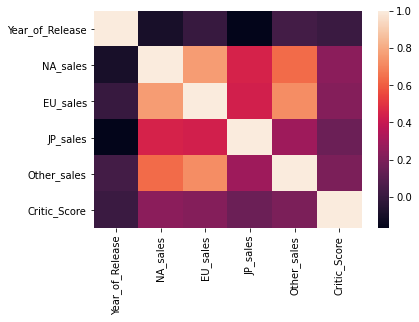

In [5]:
explore_data(games_df)

In [6]:
games_df['User_Score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: User_Score, Length: 16715, dtype: object

<a id="conclution1"></a>
### Вывод
В этом разделе провели знакомство с набором данных, были обнаружены пропуски в столбцах 
* Name 
* Year_of_Release 
* Genre       
* Critic_Score    
* User_Score
* Rating
Каких-либо сильных корреляций в сырых данных не обнаружено, разве что только продажи с продажами 🤡
Необходимо выполнить преобразование типов для дат, Заполнить пропуски, привести к нижнему регистру названия столбцов. Явные дубликаты не обнаружены


<a id="preprocessing"></a>
## Подготовка данных



In [7]:
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

преобразуем значения столбца `year_of_release` в целочисленный

в столбце `user_score` присутствуют строковые значения `tbd` , т.к в столбце большая доля пропусков, то можно их заменить на пропуск🦊.

Заполнять пропуски в столбцах `user_score` `critic_score` заполнять не целесообразно, т.к сложно восстановить без потери качества. Скорее всего причиной пропусков является отсутствие данных

In [8]:
games_df.columns = games_df.columns.str.lower()
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')
#games_df[games_df['user_score'] == 'tbd']['user_score'] = np.nan
games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')


Пропуске в столбце `name` заменим на 'unknown', т.к доля пропусков незначительна, то это не исказит результаты исследования(можно было и не трогать их🦊 ) и расчитаем сумму полных продаж

In [9]:
games_df['name'] = games_df['name'].fillna('unknown')


In [10]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

<a id="conclution2"></a>
### Вывод
Итак, в этом разделе мы 
* заполнили некоторые пропуски в данных
* Привели к нижнему регистру названия столбцов;
* Выполнили преобразования данные в нужные типы
* Обработали пропуски
* Посчитали суммарные продажи во всех регионах .

<a id="eda"></a>
## Исследовательский анализ данных 🔎
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.


Сгруппируем данные по годам и посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:>

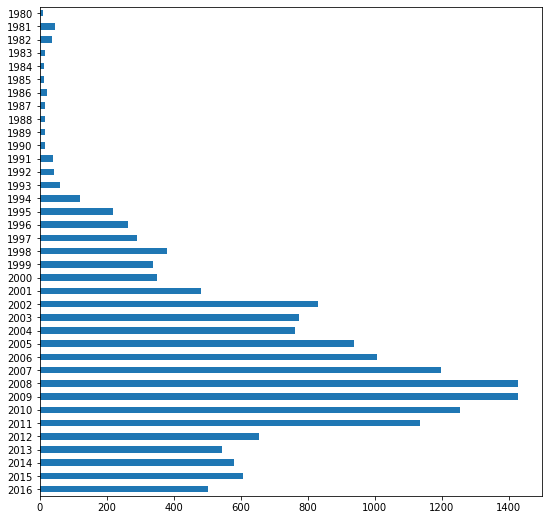

In [11]:
games_df['year_of_release'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(9,9))


В целом график похож на нормальное распределение, но есть небольшое смещение. Судя по всему, хвост до 1995 года можно было бы и не использовать (получили бы нормальное чччоткое 😎 распределение). НО доля пропусков в рейтингах и так слишком большая,поэтому не будем усугублять ситуацию🧐 

Теперь посмотрим, как менялись продажи с течением времени. по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

<AxesSubplot:xlabel='year_of_release', ylabel='Количество продаж(млн)'>

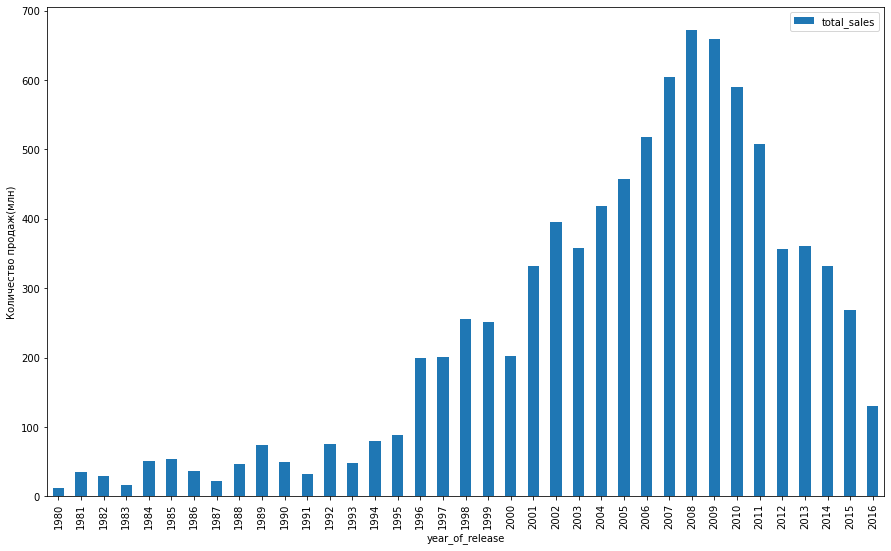

In [12]:
games_df[['year_of_release','total_sales']].groupby(by='year_of_release').agg('sum').plot(kind='bar',figsize=(15,9), ylabel='Количество продаж(млн)')

Упс, где-то этот график уже видели 🤫 Все логично, больше игр - больше продаж, мог бы и догадаться🤦 Да, 2010-е были богаты на шедевры игровой индустрии😢
Быстренько определим лидеров игропроизводства

<AxesSubplot:ylabel='platform'>

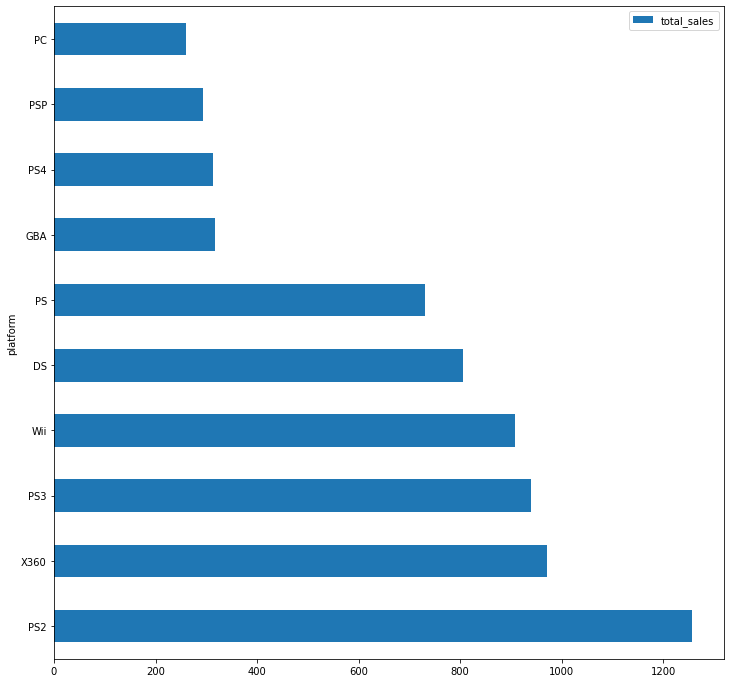

In [13]:
top_platform = games_df[['platform','total_sales']].groupby(by='platform').agg('sum').sort_values(by='total_sales', ascending=False).head(10)
top_platform.plot(kind='barh',figsize=(12,12), ylabel='Количество продаж(млн)')

ОГО `PS2` вырывается влидеры 🥇 Ээээх вспоминаются Спайро и Крэш Бандикут😹

НУШТОШ, время серьезной работы 🤓🤓🤓 изобразим странные линии и посмотрим, как жили и умирали легенды игропрома

<AxesSubplot:xlabel='year_of_release'>

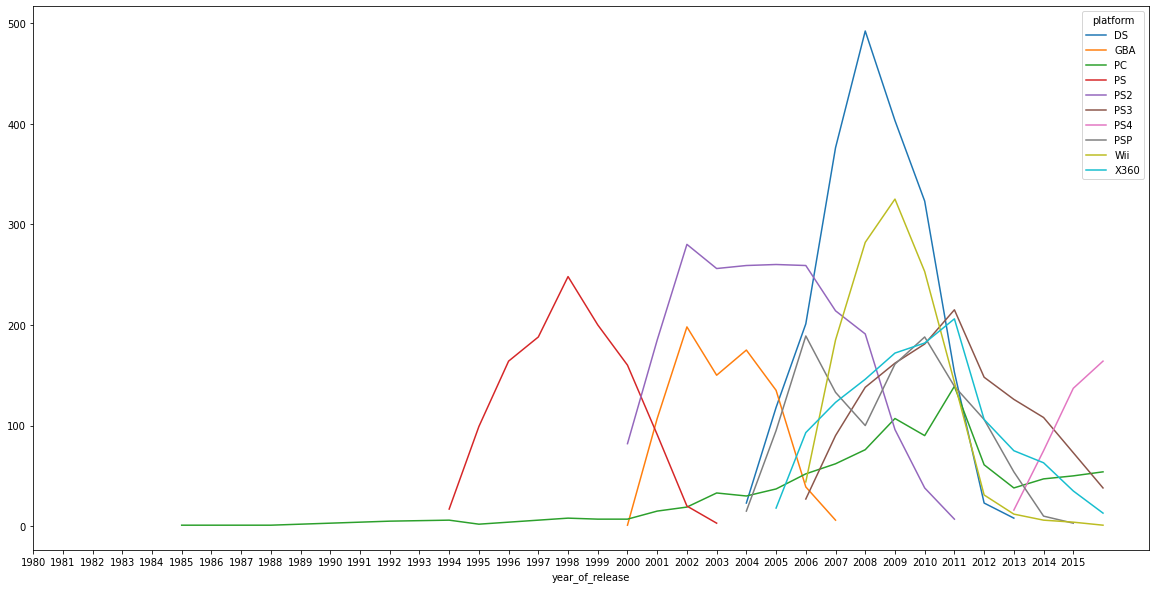

In [14]:
pivot_df = pd.pivot_table(games_df[games_df['platform'].isin(top_platform.index)], index='year_of_release', columns='platform', values='name', aggfunc='count')
pivot_df.plot(kind='line',xticks=range(1980,2016), figsize=(20,10))

Красивое 🐈, почти как рыбов
Стоит заметить, что за все время был только один долгожитель - ПК и даже сейчас чувствует себя не хуже всех. У консолей доволно резкие взлеты , но уж очень быстро исчезают

In [19]:
##games_df.groupby(['year_of_release','platform'])['name'].agg('count')

pivot = games_df[['platform','year_of_release', 'name']].groupby(by=['year_of_release','platform']).agg('count')#.plot(kind='line',y=,figsize=(12,12))
pivot.plot(kind='line')

Попробуем вычислить среднюю продолжительность жизни платформы(не зря же учили мОтемОтЕку🤓🤓🤓)
💡 Идея: пока платформа интересна - на нее делают игры => если количество игр на платформе падает, то вполне вероятно, что снижение количества игр, может свидетельствовать, что где-то появилась новая платформа. 
Таким образом, задача сводится  к нахождению для каждой платформы среднего количества лет до достижения максимума по производству игр

In [104]:
test_ = pd.pivot_table(games_df, index='year_of_release', columns='platform', values='name', aggfunc='count').sort_values(by='year_of_release')
year_to_max = 0
for column in test_.columns:
    tmp = test_[test_[column].isna()==False][column]
    local_max = tmp.index[tmp==tmp.max()].tolist()[0] 
    #print(column, local_max)
    year_to_max += len(tmp.loc[:local_max])
print("Средний срок жизни платформы: ",year_to_max/len(test_.columns))

Средний срок жизни платформы:  4.129032258064516


Итак, получили Средний срок жизни платформы чуть больше 4х лет.(Раз больше, значит возьмем 5🤡 )
Возьмем данные за актуальный период и посмотрим, как вели себя топовые платформы за последний актуальный период

<AxesSubplot:xlabel='year_of_release'>

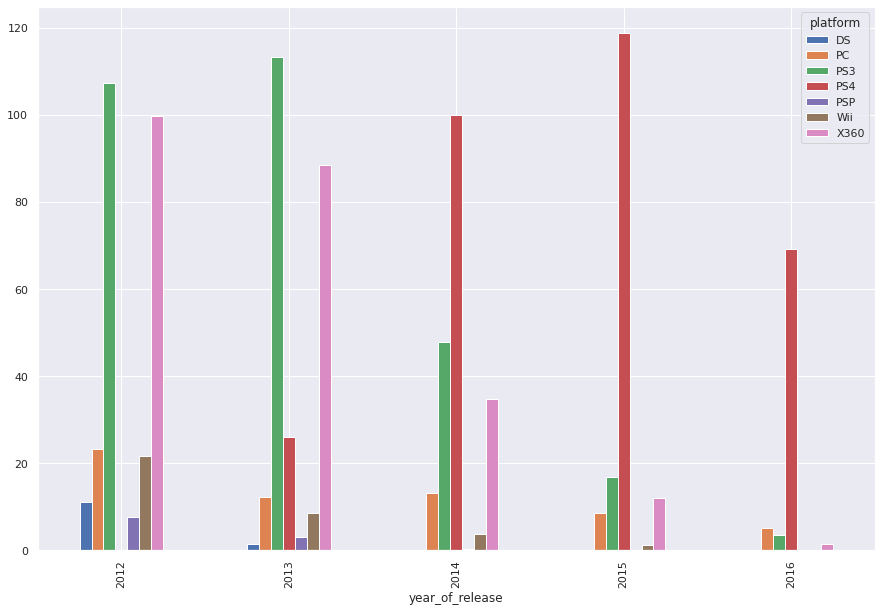

In [105]:
actual_df = games_df[games_df['year_of_release'] >= 2012]
actual_pivot = pd.pivot_table(actual_df[actual_df['platform'].isin(top_platform.index)], index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_pivot.plot(kind='bar', figsize=(15,10))

In [106]:
import warnings
warnings.filterwarnings("ignore") 
actual_df['year_of_release']= actual_df['year_of_release'].astype('str')# чтоб год отображался на графике без дробных значений

<AxesSubplot:xlabel='year_of_release'>

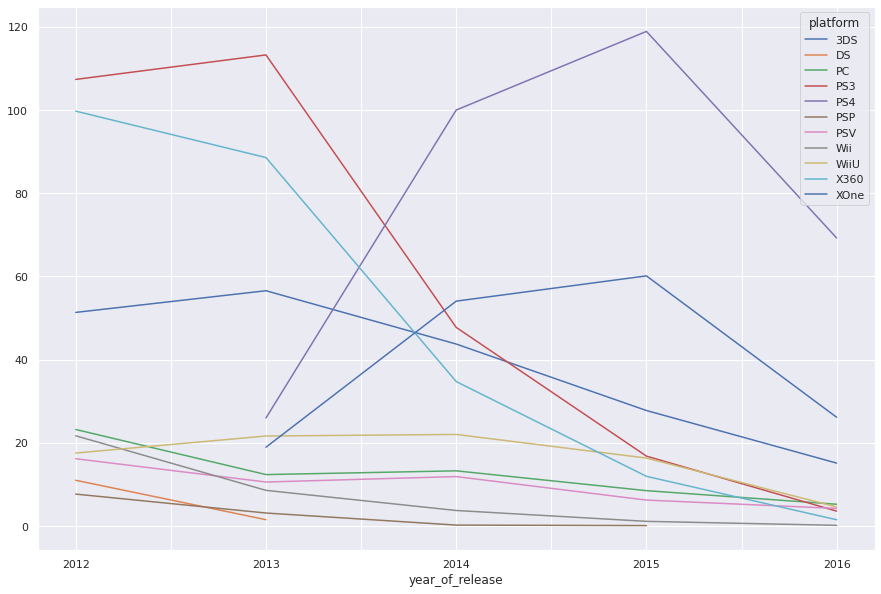

In [107]:
actual_pivot = pd.pivot_table(actual_df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_pivot.plot(kind='line', figsize=(15,10))

Наблюдаем общуюю тенденцию по сокращению продаж игр, люди перестали играть или производители решили делать полее качественный и проработанный контент? Скорее всего и качество игр упало, и мобильные устройства повлияли.

In [108]:
actual_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:title={'center':'total sales during 2012-2016 period'}, xlabel='platform', ylabel='sales(ml)'>

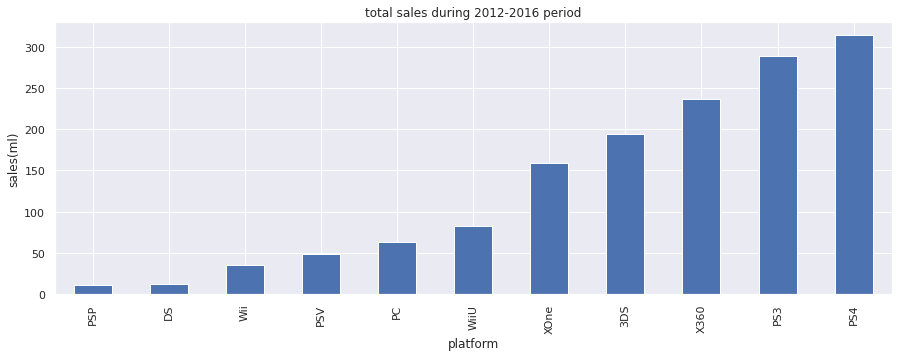

In [109]:
actual_pivot.sum().sort_values().plot(kind='bar', ylabel='sales(ml)', title='total sales during 2012-2016 period')

Список перспективных платформ:
'PC' - самая живучая платформа,
'XOne' и 'PS4' потому что новые платформы,но с уже достаточно высоким уровнем продаж, 
'3DS' -высокие продажи, 
'PSV' и 'WiiU' - просто так 🤡 

In [110]:
perspective_platforms = [ 'PC', 'XOne', 'WiiU', '3DS', 'PS4', 'PSV']

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

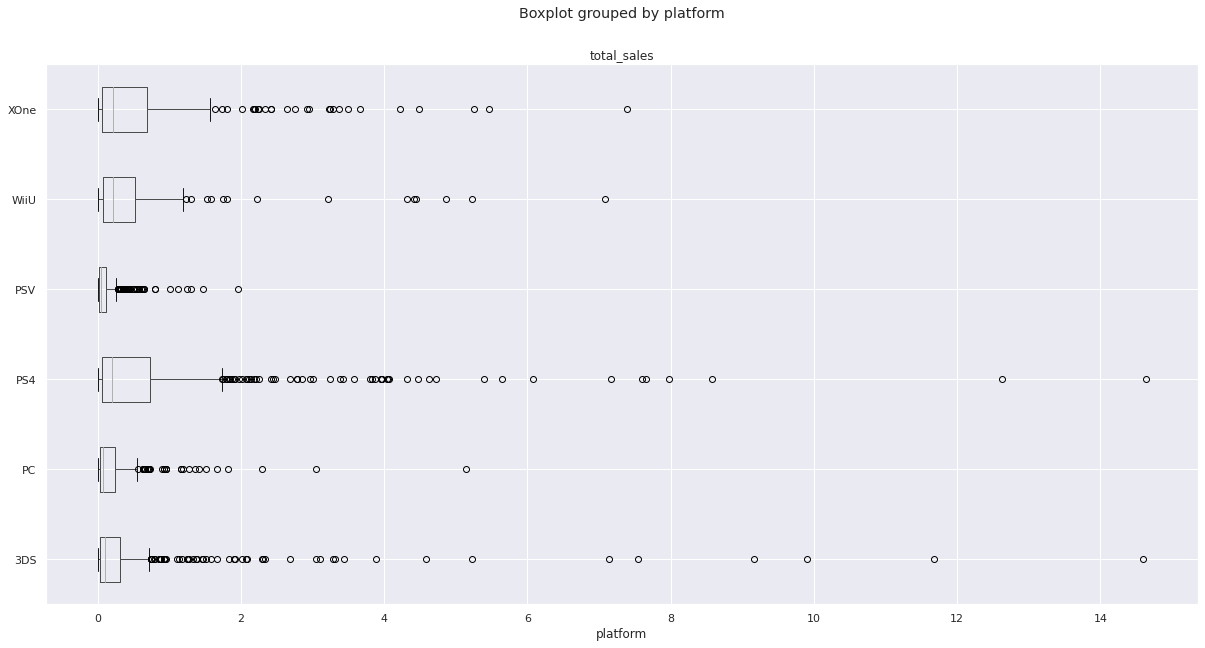

In [111]:
actual_df[actual_df['platform'].isin(perspective_platforms)].boxplot(column='total_sales', by='platform',vert=False, figsize=(20,10))


хмммм усатый что-то знает, нашлись лидеры по хитам - это PS4 и 3DS, у них максимальное количество выбросов. 

Проверим, как влияют отзывы пользователей и критиков на продажи внутри платформ . Посчитаем корреляцию между отзывами и продажами

In [112]:
def count_corr(df):
    period_corr = pd.DataFrame({'index': ['total_sales','critic_score', 'user_score']})
    for device in df['platform'].unique():
        #print(device)
        corr  = df.query('platform==@device')[['total_sales','critic_score', 'user_score']].corr()\
                .sort_values('total_sales', ascending=False)\
                .filter(items = ['total_sales'])\
                .reset_index()
        period_corr['total_sales_'+device] = corr['total_sales']

    period_corr.index = period_corr['index']
    period_corr = period_corr.drop(['index'], axis=1).drop(['total_sales']).dropna(axis=1)
    return period_corr
five_year_period_corr = count_corr(actual_df)
all_time_period_corr = count_corr(games_df)

Text(0.5, 1.0, 'Корреляции рейтингов для платформ за весь период')

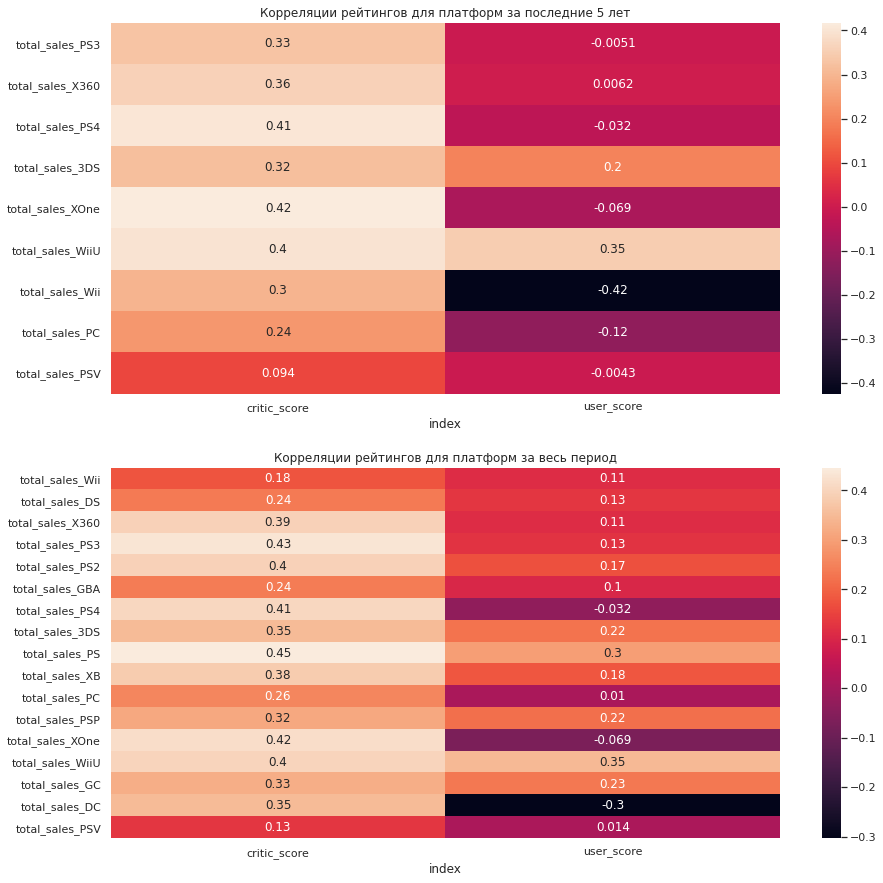

In [113]:
f, (ax1,ax2) = plt.subplots(figsize = (15, 15),nrows=2)
sns.set(rc = {'figure.figsize':(15,5)})
sns.heatmap(five_year_period_corr.T, annot=True, ax=ax1)
ax1.set_title('Корреляции рейтингов для платформ за последние 5 лет')
sns.heatmap(all_time_period_corr.T, annot=True, ax=ax2)
ax2.set_title('Корреляции рейтингов для платформ за весь период')

Построим диаграмму рассеяния

In [114]:
def sc_plot(df, platforms):    
    #actual_platforms = perspective_platforms
    fig, axs = plt.subplots(nrows=len(platforms), ncols=2, figsize=(15, 35))
    for i in range(len(platforms)):
        sc_g = df[df['platform'] == platforms[i]]
        sc_g.plot(
              kind='scatter',
              x='critic_score',
              y='total_sales',
              c='blue',
              title = 'Зависимость продаж от оценки критиков, {}'.format(platforms[i]),
              ax=axs[i, 0]
              )

        sc_g.plot(
              kind='scatter',
              x='user_score',
              y='total_sales',
              c='yellow',
            alpha=0.5,
              title = 'Зависимость продаж от оценки пользователей, {}'.format(platforms[i]), 
              ax=axs[i, 1]
              )
    plt.show()

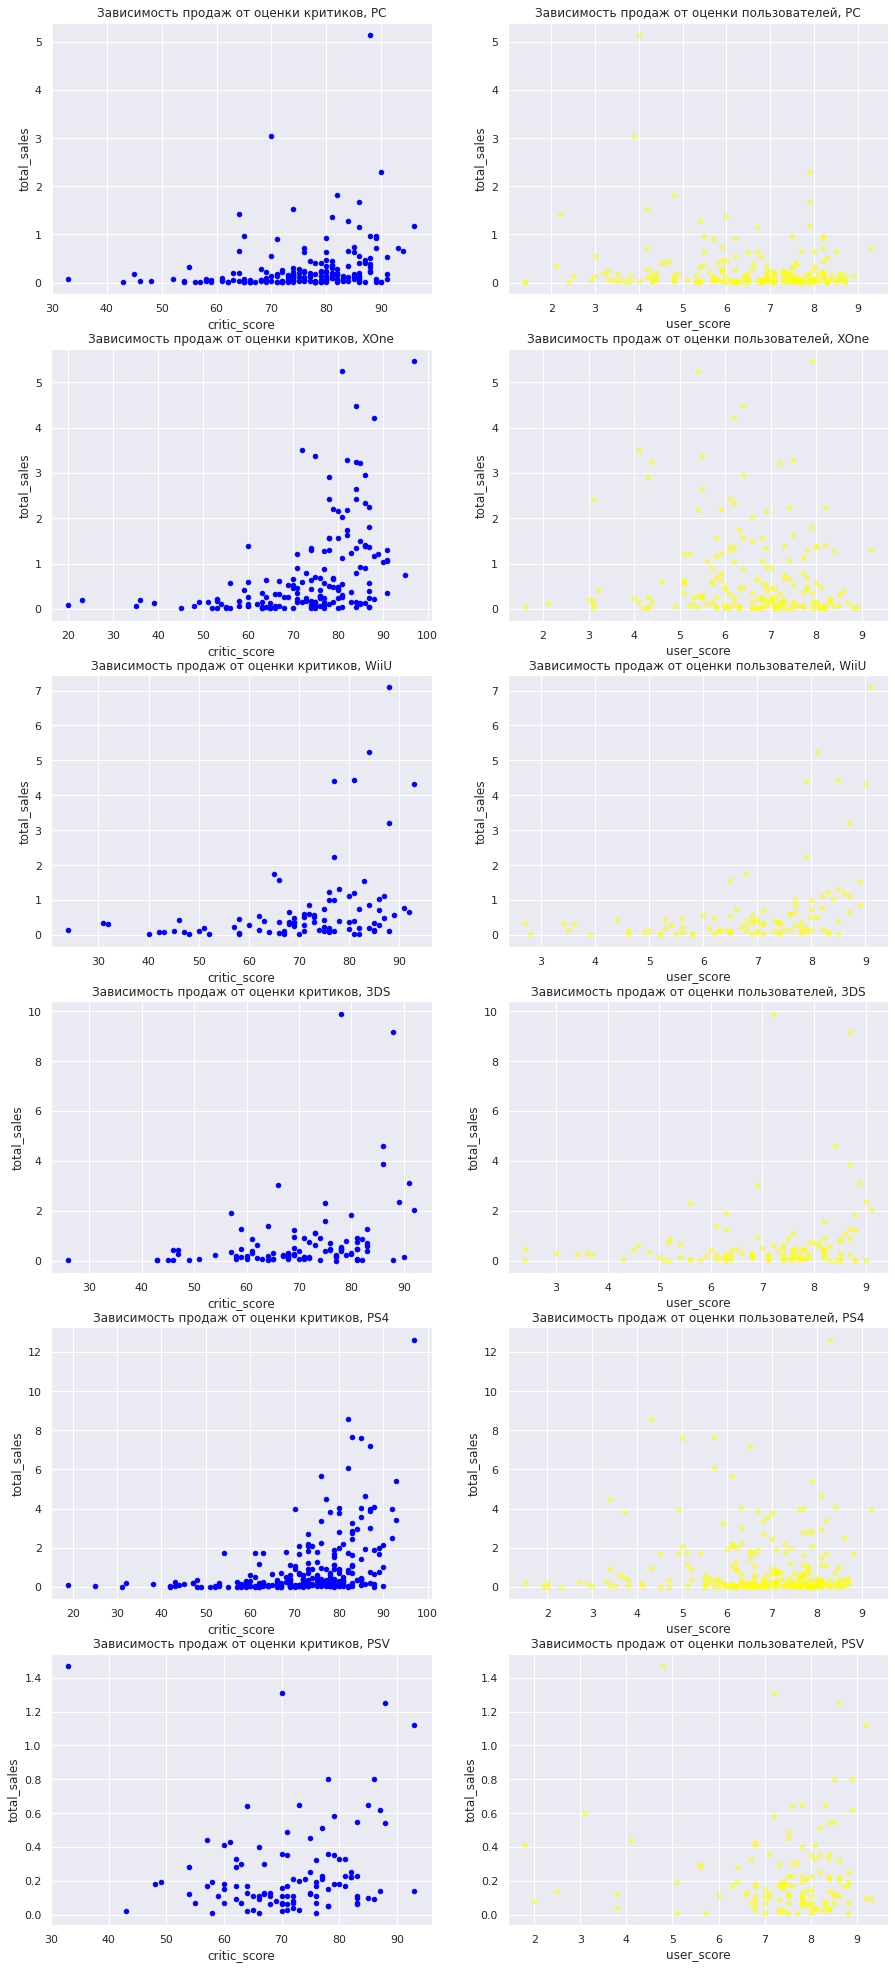

In [115]:
sc_plot(actual_df, perspective_platforms)

Диаграма рассеяния немного проясняет ситуацию. Для WiiU 3DS видно, что оценки как критиков, так и пользователей говорят о высоких продажах
В это же время для остальных платформ характерны случаи, когда у игр сневысоким игровым рейтингом могут быть высокие продажи
Почти для всех платформ

Рассммотрим распределение игр по жанрам

<AxesSubplot:title={'center':'Распределения по жанрам'}, xlabel='Жанр'>

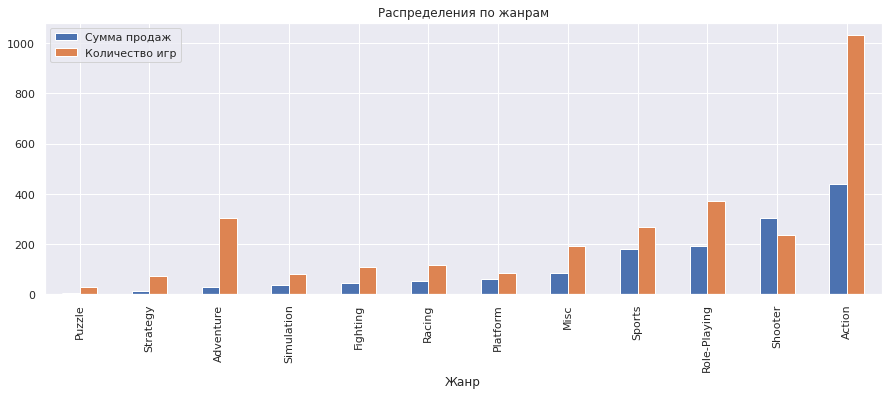

In [116]:
d1 = actual_df.groupby(by='genre').agg('sum')['total_sales']
d2 = actual_df.groupby(by='genre').agg('count')['total_sales']
(pd.DataFrame({'Сумма продаж':d1, 'Количество игр': d2})
    .sort_values(['Сумма продаж','Количество игр'])
    .plot(kind='bar', xlabel='Жанр', title='Распределения по жанрам'))

Action - Самый продаваемый и самый многочисленный жанр. Тем не менее гистограмма ниже показывает, что средние продажи этого жанра одни из самых низких. Shooter -вот где все деньги🤑🤑🤑

<AxesSubplot:title={'center':'Средние продажи по жанрам'}, xlabel='Жанр', ylabel='Средние продажи, млн'>

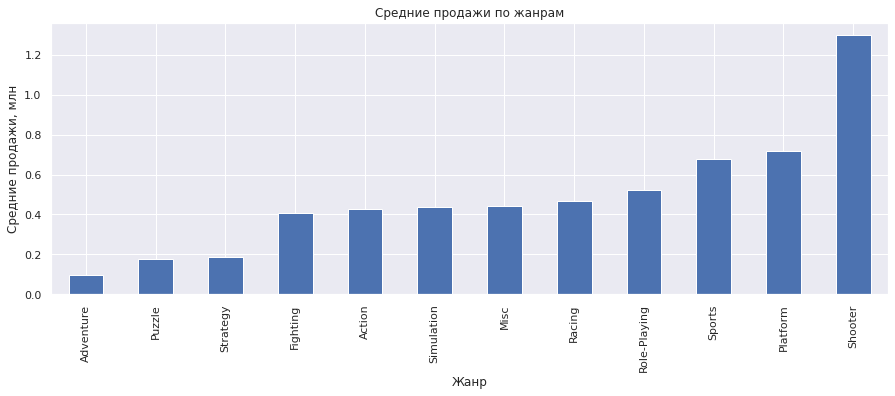

In [117]:
actual_df.groupby(by='genre').agg('mean')['total_sales'].sort_values().plot(kind='bar', xlabel='Жанр',ylabel='Средние продажи, млн',title='Средние продажи по жанрам')


<a id="conclution3"></a>
### Вывод
* Наблюдаем общуюю тенденцию по сокращению продаж игр
* Сильных зависимостей не наблюдается ни у одной из платформ. Тем не менее можно сделать вывод, что высокие оценки критиков могут свидетельствовать о более высоких продажах
* Для всех платформ,кроме WiiU 3DS характерны случаи, когда у игр сневысоким игровым рейтингом могут быть высокие продажи
* В среднем самые высокие продажи приносит жанр Shooter

<a id="users"></a>
## Портрет пользователя каждого региона


Посмотрим, как меняются интересы пользователей по географическому признаку

<AxesSubplot:title={'center':'Распределения по жанрам в регионе: '}, xlabel='Жанр'>

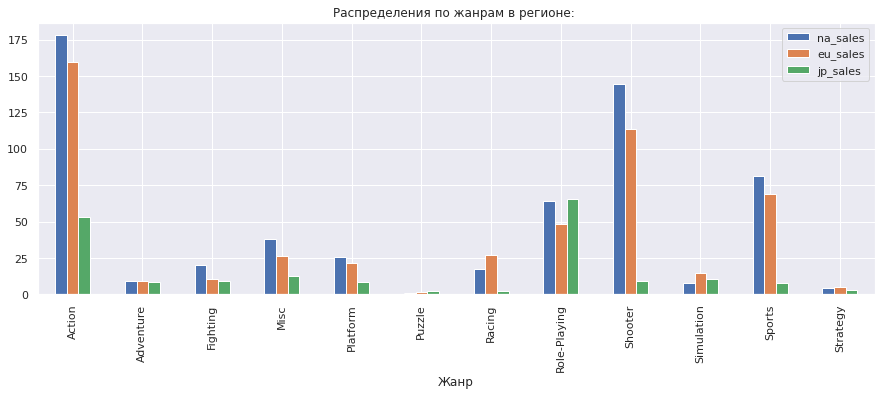

In [118]:
actual_df.groupby(by='genre').agg('sum')[['na_sales', 'eu_sales','jp_sales']].plot(kind='bar', xlabel='Жанр', title='Распределения по жанрам в регионе: ')

Пользователи северной америки и европы практически идентичны и предпочитают экшны, шутеры, спортивные симуляторы и рпг.
А вот японцы больше склонны покупать рпг, экшны и аркады
Что касается платформ, то американцы и европейцы  чаще используют приставки PS и Xbox, а вот японцы опять отличились - уж очень они любят портативные консоли 3DS и PSV. Интересно, возможно это значит, что японцы чаще перемещаются(ну или вместо перекуров на работе качаю скиллы ¯ \ _ (ツ) _ / ¯ )

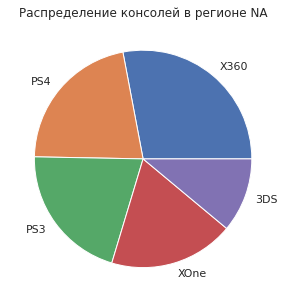

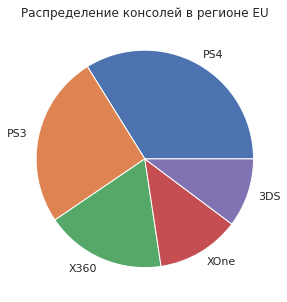

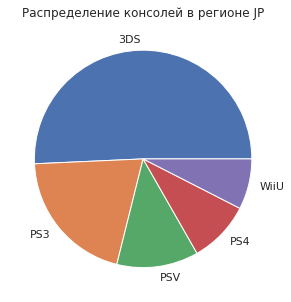

In [119]:
for region in ['na', 'eu', 'jp']:
    region_top5_platform = actual_df[['platform',region+'_sales']].groupby(by='platform').agg('sum').sort_values(by=region+'_sales', ascending=False).head()
    region_top5_platform[region+'_sales'].plot(kind='pie', ylabel='', title='Распределение консолей в регионе '+region.upper())
    plt.show()

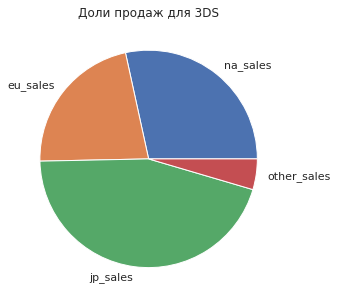

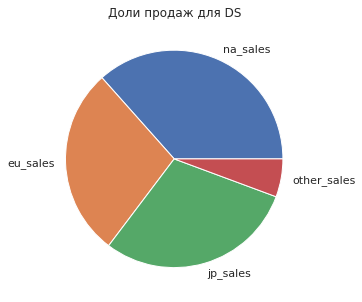

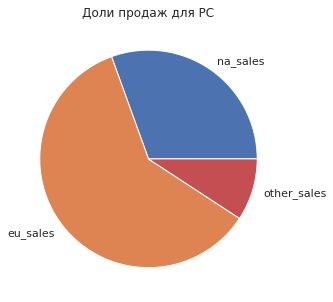

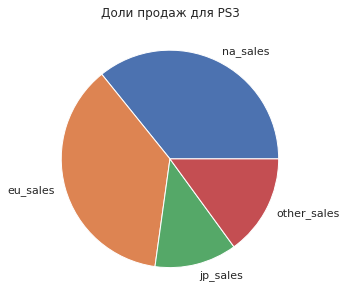

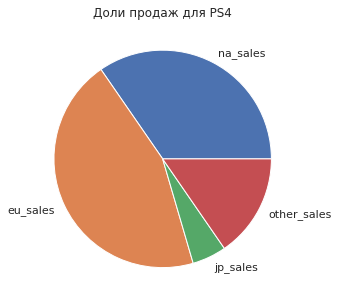

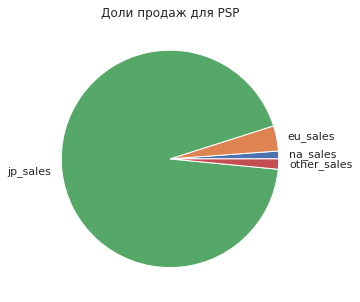

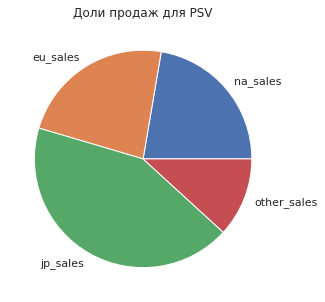

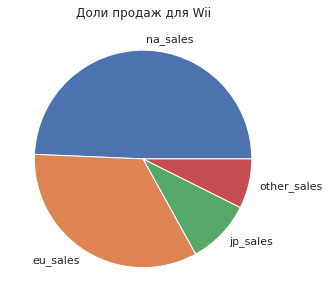

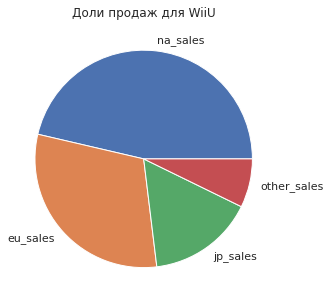

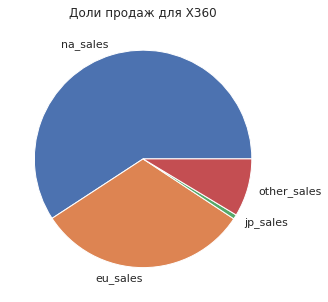

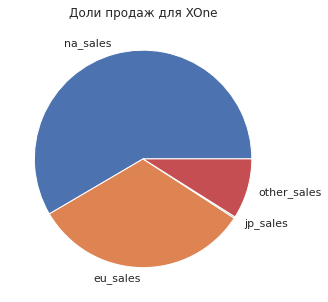

In [120]:
platform_partition = actual_df.groupby(by='platform').agg('sum')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
for i in platform_partition.index:
    platform_partition.loc[i,:].plot(kind='pie', title='Доли продаж для '+i, ylabel='')
    plt.show()

Посмотрим, на какуие возрастные группы приходится больше продаж в различных регионах

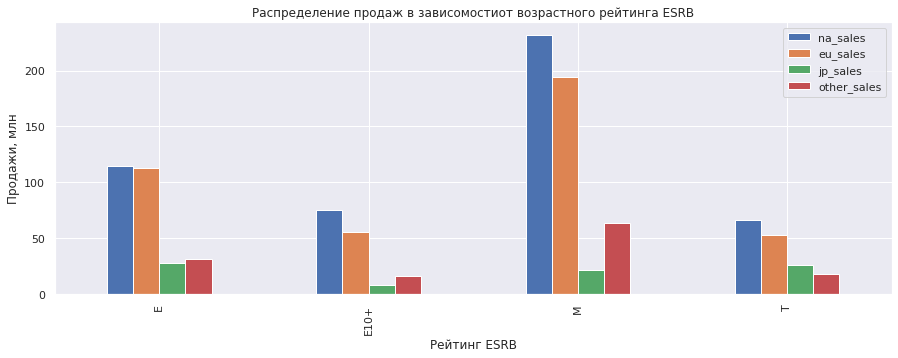

In [121]:
test = actual_df.groupby(by='rating').agg('sum')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]\
    .plot(kind='bar', title='Распределение продаж в зависомостиот возрастного рейтинга ESRB',
         xlabel='Рейтинг ESRB', ylabel='Продажи, млн')#.sort_values(by='total_sales', ascending=False).head()

<a id="conclution4"></a>
### Вывод
* американцы и европейцы предпочитают **PS** и **Xbox**
* японцы отличаются от  -больше склонны покупать рпг, экшны и аркады ,предпочитают портативные консоли 
* больше всего игр продается с рейтингом **М** и **Е**

<a id="hypoteses"></a>
## Проверка гипотез
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind()
Нулевая гипотеза H₀ - Средние пользовательские рейтинги платформ Xbox One и PC равны .
Альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC не равны


In [122]:
alpha = 0.01
result = st.ttest_ind(actual_df.query('platform == "XOne" and user_score.isna() == False')['user_score'],
                     actual_df.query('platform == "PC" and user_score.isna() == False')['user_score'],
                     equal_var=False)
# p-value - это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна
print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')

p-value:  0.5489537965134912
Нулевая гипотеза верна


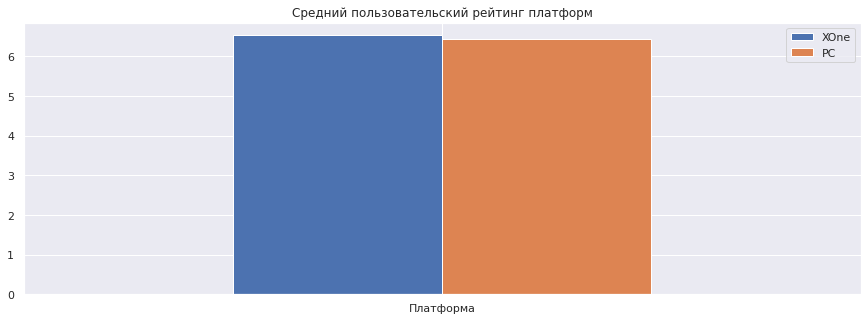

In [123]:
df = pd.DataFrame({'XOne': actual_df.query('platform == "XOne"')['user_score'].mean(),
                   'PC': actual_df.query('platform == "PC"')['user_score'].mean()}, index=['Платформа'])
df.plot.bar(rot=0)
plt.title('Средний пользовательский рейтинг платформ')
plt.show()

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀ - Средние пользовательские рейтинги жанров Action и Sports равны .

Альтернативная гипотеза H₁ - Средние пользовательские рейтинги жанров Action и Sports не равны


In [124]:
alpha = 0.01
result = st.ttest_ind(actual_df.query('genre == "Action" and user_score.isna() == False')['user_score'],
                     actual_df.query('genre == "Sports" and user_score.isna() == False')['user_score'],
                     equal_var=False)
# p-value - это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна
print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')

p-value:  4.24307776572644e-20
Отвергаем нулевую гипотезу


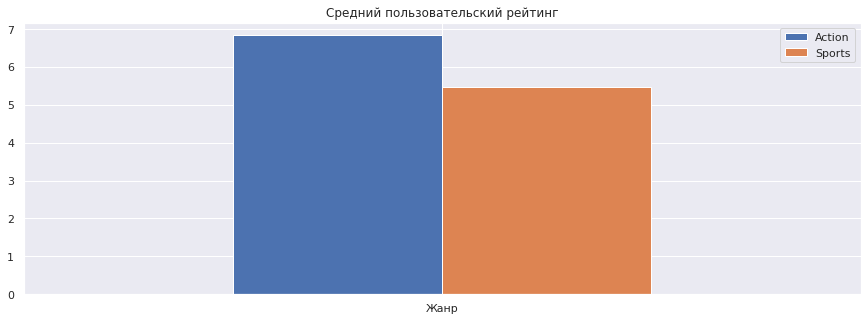

In [125]:
df = pd.DataFrame({'Action': actual_df.query('genre == "Action"')['user_score'].mean(),
                   'Sports': actual_df.query('genre == "Sports"')['user_score'].mean()}, index=['Жанр'])
df.plot.bar(rot=0)
plt.title('Средний пользовательский рейтинг')
plt.show()

<a id="conclution5"></a>
### Вывод
* Средние пользовательские рейтинги жанров Action и Sports различаются
* Средние пользовательские рейтинги жанров Action и Sports не равны

<a id="summary"></a>
# Шаг 6. Общий вывод
Итак, в этом проекте проанализировали данные из игровой индустрии
* общая тенденция на падение продаж в игровом сегменте
* игры с нсредним\низким  пользовательским рейтингом могут иметь высокие продаживы, поэтому более важно заполучить симпатии пользователей, чем критиков. Тем не менее, высокие оценки критиков могут свидетельствовать о более высоких продажах, но с невысоким пользовательским рейтингом могут быть высокие продажи (это характерно, например, для WiiU 3DS)
* Определили портреты пользователей для разных регионов
* Выявили самые популярные и продаваемые жанры и платформы
    * на западе предпочитают **PS** и **Xbox** экшны, шутеры, спортивные симуляторы и рпг
    * на востоке больше склонны покупать рпг, экшны и аркады ,предпочитают портативные консоли 
* больше всего игр продается с рейтингом **М** и **Е**
* проверили гипотезы и установили, что
    *Средние пользовательские рейтинги жанров Action и Sports различаются
    *Средние пользовательские рейтинги жанров Action и Sports не равны
    
Если мы все-таки решимся выпустить игровой шедеврв 2017, то это должен быть шутер-экшн на PS4-XOne (можно дополнительно сделать версию для 3DS или PSV) с возрастным рейтингом М или Е. Предварительно было бы неплохо проанализировать отзывы пользовотелей
Руководство интернет-магазина «Стримчик» давайте деньги, бумажные, желательно в валюте🤡 